In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data set

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df1 = df.copy()

In [4]:
df2 = df.copy()

In [5]:
df3 = df.copy()

# Preprocessing Data 

In [6]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label = LabelEncoder()

In [9]:
df2.Gender = label.fit_transform(df2['Gender'])

In [10]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
df2.Gender.value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

# Seperate x(Gender, Height) and y (y=Weight)

# x = Gender, y = Weight

In [12]:
x = df2[['Gender']]
y = df2[['Weight']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30)

In [15]:
xtrain.head()

,Gender
645,1
6415,0
1246,1
5315,0
1517,1


# Apply Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
l_reg = LinearRegression()

In [18]:
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [19]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [20]:
pred = l_reg.predict(xtest)

In [21]:
np.array(pred)

array([[134.96433821],
       [187.34510606],
       [187.34510606],
       ...,
       [187.34510606],
       [134.96433821],
       [187.34510606]])

In [22]:
accuracy = l_reg.score(xtest,ytest)

In [23]:
accuracy

0.5913233378418974

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(ytest,pred)

In [26]:
mse

397.04484079230576

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mae = mean_absolute_error(ytest,pred)

In [29]:
mae

15.82583598386484

# KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
kneigh = KNeighborsRegressor(n_neighbors=5)

In [32]:
kneigh.fit(xtrain,ytrain)

KNeighborsRegressor()

In [33]:
knn_reg_pred = kneigh.predict(xtest)

In [34]:
knn_reg_pred

array([[143.92150734],
       [190.0808778 ],
       [190.0808778 ],
       ...,
       [190.0808778 ],
       [143.92150734],
       [190.0808778 ]])

In [35]:
knn_accuracy = kneigh.score(xtest,ytest)

In [36]:
knn_accuracy

0.5658645179521502

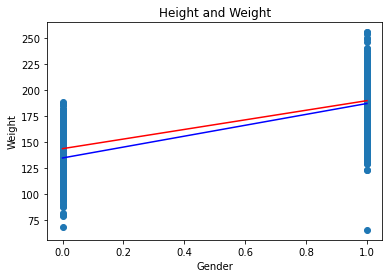

In [37]:
plt.scatter(xtest,ytest)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Height and Weight')
plt.plot(xtest.squeeze(),l_reg.predict(xtest), color = 'Blue')
plt.plot(xtest.squeeze(),kneigh.predict(xtest), color = 'Red')

In [38]:
knn_mse = mean_squared_error(ytest,knn_reg_pred)

In [39]:
knn_mse

421.77904762590776

# x=Height, y = Weight

In [40]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [41]:
X=df2[['Height']]

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.30)

In [43]:
xtrain.head()

,Height
262,70.993144
5477,63.580276
2707,67.196519
1325,75.753446
3371,70.030762


In [44]:
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [45]:
pred_1 = l_reg.predict(xtest)

In [46]:
np.array(pred_1)

array([[148.35563982],
       [240.92023861],
       [145.59183379],
       ...,
       [176.10650618],
       [169.88566676],
       [200.34544057]])

In [47]:
accuracy_1 = l_reg.score(xtest,ytest)

In [48]:
accuracy_1

0.8575278990326465

In [49]:
mse_1 = mean_squared_error(ytest,pred_1)

In [50]:
mse_1

148.1501826591423

In [51]:
mae_1 = mean_absolute_error(ytest,pred_1)

In [52]:
mae_1

9.730872785452657

# KNN model Linear regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [57]:
kneigh.fit(xtrain,ytrain)

KNeighborsRegressor()

In [58]:
knn_pred_1 = kneigh.predict(xtest)

In [59]:
knn_pred_1

array([[142.29249378],
       [232.62523766],
       [135.08667634],
       ...,
       [178.19054072],
       [176.41162216],
       [202.59185216]])

In [60]:
knn_accuracy_1 = kneigh.score(xtest,ytest)

In [61]:
knn_accuracy_1

0.8322411622311106

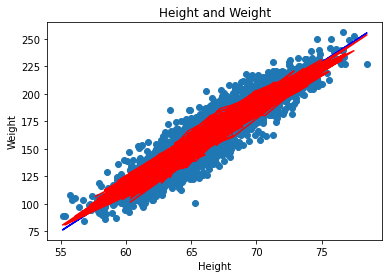

In [62]:
plt.scatter(xtest,ytest)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight')
plt.plot(xtest.squeeze(),l_reg.predict(xtest), color = 'Blue')
plt.plot(xtest.squeeze(),kneigh.predict(xtest), color = 'Red')

In [63]:
mse_knn_1 = mean_squared_error(ytest,knn_pred_1)

In [64]:
mse_knn_1

174.4446968171081

# Step:2: KNN Classifier:

In [65]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [66]:
df1.Gender = label.fit_transform(df1['Gender'])

In [67]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [68]:
df1.Gender.value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

In [69]:
x1 = df1.drop('Gender',axis=1)
y1 = df1['Gender']

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,random_state=42,test_size=.30)

In [71]:
xtrain.shape

(5988, 2)

In [72]:
ytrain.shape

(5988,)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
neig_clf = KNeighborsClassifier(n_neighbors=5)

In [75]:
neig_clf.fit(xtrain,ytrain)

KNeighborsClassifier()

In [76]:
neig_clf_predict = neig_clf.predict(xtest)

In [77]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [78]:
print(classification_report(ytest,neig_clf_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [79]:
confusion_matrix(ytest,neig_clf_predict)

array([[ 945,  121],
       [ 102, 1399]], dtype=int64)

In [80]:
accuracy_score(ytest,neig_clf_predict)

0.9131281651733542

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


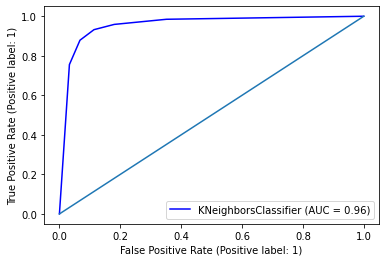

In [81]:
plot_roc_curve(neig_clf,xtest,ytest, color = 'Blue')
plt.plot([0,1],[0,1])